In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
df=pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [3]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
len(df.columns)

46

In [5]:
len(df)

7728394

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [8]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [9]:
'NY' in df.State

False

<Axes: ylabel='City'>

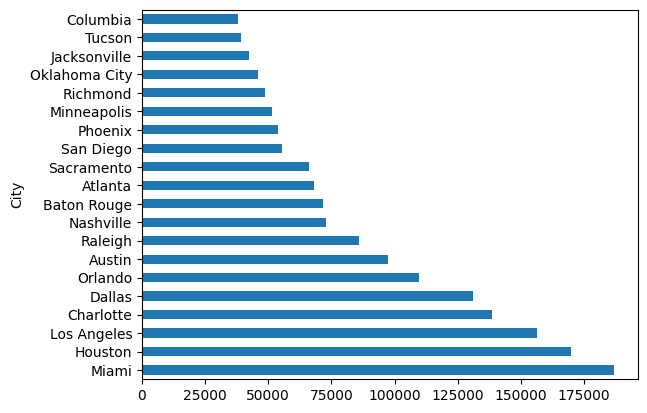

In [10]:
cities_by_accidents[:20].plot(kind='barh')


<Axes: ylabel='State'>

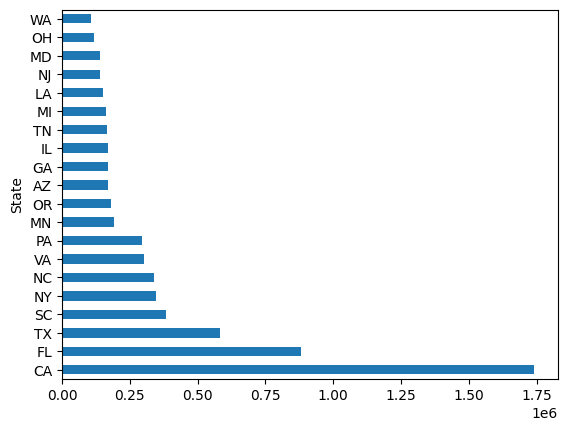

In [11]:
states=df.State.value_counts()
states[:20].plot(kind='barh')

In [14]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [21]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [22]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [23]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

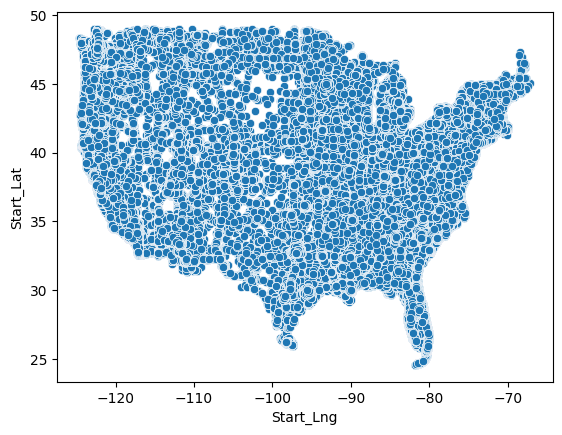

In [24]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [12]:
## A list of questions

1-Are there more accidents in warmer or colder areas?
2-Which 5 states have the highest number of accidents? How about per capita?
3-Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4-Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5-What time of the day are accidents most frequent in? - ANSWERED
6-Which days of the week have the most accidents?
7-Which months have the most accidents?
8-What is the trend of accidents year over year (decreasing/increasing?)When is accidents per unit of traffic the highest.

SyntaxError: invalid syntax (2433430099.py, line 5)